This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# xarray ODIM backend

In this example, we read ODIM_H5 (HDF5) data files using the xradar `odim` backend. Throughout the notebook xarray accessors are used to access wradlib functionality.

In [1]:
import glob
import os
import wradlib as wrl
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import xradar as xd
import xarray as xr

try:
    get_ipython().run_line_magic("matplotlib inline")
except:
    plt.ion()

## Load ODIM_H5 Volume Data

In [2]:
fpath = "hdf5/knmi_polar_volume.h5"
f = wrl.util.get_wradlib_data_file(fpath)
vol = xd.io.open_odim_datatree(f)

## Inspect RadarVolume

In [3]:
display(vol)

<xarray.DataTree>
Group: /
│   Dimensions:              (sweep: 14)
│   Dimensions without coordinates: sweep
│   Data variables:
│       volume_number        int64 8B 0
│       platform_type        <U5 20B 'fixed'
│       instrument_type      <U5 20B 'radar'
│       time_coverage_start  <U20 80B '2011-06-10T11:40:02Z'
│       time_coverage_end    <U20 80B '2011-06-10T11:43:54Z'
│       longitude            float32 4B 4.79
│       altitude             float32 4B 50.0
│       latitude             float32 4B 52.95
│       sweep_group_name     (sweep) int64 112B 0 1 2 3 4 5 6 7 8 9 10 11 12 13
│       sweep_fixed_angle    (sweep) float32 56B 0.3 0.4 0.8 1.1 ... 15.0 20.0 25.0
│   Attributes:
│       Conventions:      ODIM_H5/V2_2
│       instrument_name:  None
│       version:          None
│       title:            None
│       institution:      None
│       references:       None
│       source:           None
│       history:          None
│       comment:          im/exported using xradar
├── Group: /sweep_0
│       Dimensions:            (azimuth: 360, range: 320)
│       Coordinates:
│           elevation          (azimuth) float32 1kB ...
│           time               (azimuth) datetime64[ns] 3kB 2011-06-10T11:40:17.36111...
│         * range              (range) float32 1kB 500.0 1.5e+03 ... 3.185e+05 3.195e+05
│           longitude          float32 4B ...
│           latitude           float32 4B ...
│           altitude           float32 4B ...
│         * azimuth            (azimuth) float32 1kB 0.5 1.5 2.5 ... 357.5 358.5 359.5
│       Data variables:
│           DBZH               (azimuth, range) float32 461kB ...
│           sweep_mode         <U20 80B ...
│           sweep_number       int64 8B ...
│           prt_mode           <U7 28B ...
│           follow_mode        <U7 28B ...
│           sweep_fixed_angle  float32 4B ...
├── Group: /sweep_1
│       Dimensions:            (azimuth: 360, range: 240)
│       Coordinates:
│           elevation          (azimuth) float32 1kB ...
│           time               (azimuth) datetime64[ns] 3kB 2011-06-10T11:40:36.80555...
│         * range              (range) float32 960B 500.0 1.5e+03 ... 2.395e+05
│           longitude          float32 4B ...
│           latitude           float32 4B ...
│           altitude           float32 4B ...
│         * azimuth            (azimuth) float32 1kB 0.5 1.5 2.5 ... 357.5 358.5 359.5
│       Data variables:
│           DBZH               (azimuth, range) float32 346kB ...
│           sweep_mode         <U20 80B ...
│           sweep_number       int64 8B ...
│           prt_mode           <U7 28B ...
│           follow_mode        <U7 28B ...
│           sweep_fixed_angle  float32 4B ...
├── Group: /sweep_2
│       Dimensions:            (azimuth: 360, range: 240)
│       Coordinates:
│           elevation          (azimuth) float32 1kB ...
│           time               (azimuth) datetime64[ns] 3kB 2011-06-10T11:40:56.30555...
│         * range              (range) float32 960B 500.0 1.5e+03 ... 2.395e+05
│           longitude          float32 4B ...
│           latitude           float32 4B ...
│           altitude           float32 4B ...
│         * azimuth            (azimuth) float32 1kB 0.5 1.5 2.5 ... 357.5 358.5 359.5
│       Data variables:
│           DBZH               (azimuth, range) float32 346kB ...
│           sweep_mode         <U20 80B ...
│           sweep_number       int64 8B ...
│           prt_mode           <U7 28B ...
│           follow_mode        <U7 28B ...
│           sweep_fixed_angle  float32 4B ...
├── Group: /sweep_3
│       Dimensions:            (azimuth: 360, range: 240)
│       Coordinates:
│           elevation          (azimuth) float32 1kB ...
│           time               (azimuth) datetime64[ns] 3kB 2011-06-10T11:41:15.80555...
│         * range              (range) float32 960B 500.0 1.5e+03 ... 2.395e+05
│           longitude          float32 4B ...
│           latitude           floa

## Inspect root group

The `sweep` dimension contains the number of scans in this radar volume. Further the dataset consists of variables (location coordinates, time_coverage) and attributes (Conventions, metadata).

In [4]:
vol.root

<xarray.DataTree>
Group: /
│   Dimensions:              (sweep: 14)
│   Dimensions without coordinates: sweep
│   Data variables:
│       volume_number        int64 8B 0
│       platform_type        <U5 20B 'fixed'
│       instrument_type      <U5 20B 'radar'
│       time_coverage_start  <U20 80B '2011-06-10T11:40:02Z'
│       time_coverage_end    <U20 80B '2011-06-10T11:43:54Z'
│       longitude            float32 4B 4.79
│       altitude             float32 4B 50.0
│       latitude             float32 4B 52.95
│       sweep_group_name     (sweep) int64 112B 0 1 2 3 4 5 6 7 8 9 10 11 12 13
│       sweep_fixed_angle    (sweep) float32 56B 0.3 0.4 0.8 1.1 ... 15.0 20.0 25.0
│   Attributes:
│       Conventions:      ODIM_H5/V2_2
│       instrument_name:  None
│       version:          None
│       title:            None
│       institution:      None
│       references:       None
│       source:           None
│       history:          None
│       comment:          im/exported using xradar
├── Group: /sweep_0
│       Dimensions:            (azimuth: 360, range: 320)
│       Coordinates:
│           elevation          (azimuth) float32 1kB ...
│           time               (azimuth) datetime64[ns] 3kB 2011-06-10T11:40:17.36111...
│         * range              (range) float32 1kB 500.0 1.5e+03 ... 3.185e+05 3.195e+05
│           longitude          float32 4B ...
│           latitude           float32 4B ...
│           altitude           float32 4B ...
│         * azimuth            (azimuth) float32 1kB 0.5 1.5 2.5 ... 357.5 358.5 359.5
│       Data variables:
│           DBZH               (azimuth, range) float32 461kB ...
│           sweep_mode         <U20 80B ...
│           sweep_number       int64 8B ...
│           prt_mode           <U7 28B ...
│           follow_mode        <U7 28B ...
│           sweep_fixed_angle  float32 4B ...
├── Group: /sweep_1
│       Dimensions:            (azimuth: 360, range: 240)
│       Coordinates:
│           elevation          (azimuth) float32 1kB ...
│           time               (azimuth) datetime64[ns] 3kB 2011-06-10T11:40:36.80555...
│         * range              (range) float32 960B 500.0 1.5e+03 ... 2.395e+05
│           longitude          float32 4B ...
│           latitude           float32 4B ...
│           altitude           float32 4B ...
│         * azimuth            (azimuth) float32 1kB 0.5 1.5 2.5 ... 357.5 358.5 359.5
│       Data variables:
│           DBZH               (azimuth, range) float32 346kB ...
│           sweep_mode         <U20 80B ...
│           sweep_number       int64 8B ...
│           prt_mode           <U7 28B ...
│           follow_mode        <U7 28B ...
│           sweep_fixed_angle  float32 4B ...
├── Group: /sweep_2
│       Dimensions:            (azimuth: 360, range: 240)
│       Coordinates:
│           elevation          (azimuth) float32 1kB ...
│           time               (azimuth) datetime64[ns] 3kB 2011-06-10T11:40:56.30555...
│         * range              (range) float32 960B 500.0 1.5e+03 ... 2.395e+05
│           longitude          float32 4B ...
│           latitude           float32 4B ...
│           altitude           float32 4B ...
│         * azimuth            (azimuth) float32 1kB 0.5 1.5 2.5 ... 357.5 358.5 359.5
│       Data variables:
│           DBZH               (azimuth, range) float32 346kB ...
│           sweep_mode         <U20 80B ...
│           sweep_number       int64 8B ...
│           prt_mode           <U7 28B ...
│           follow_mode        <U7 28B ...
│           sweep_fixed_angle  float32 4B ...
├── Group: /sweep_3
│       Dimensions:            (azimuth: 360, range: 240)
│       Coordinates:
│           elevation          (azimuth) float32 1kB ...
│           time               (azimuth) datetime64[ns] 3kB 2011-06-10T11:41:15.80555...
│         * range              (range) float32 960B 500.0 1.5e+03 ... 2.395e+05
│           longitude          float32 4B ...
│           latitude           floa

## Inspect sweep group(s)

The sweep-groups can be accessed via their respective keys. The dimensions consist of `range` and `time` with added coordinates `azimuth`, `elevation`, `range` and `time`. There will be variables like radar moments (DBZH etc.) and sweep-dependend metadata (like `fixed_angle`, `sweep_mode` etc.).

In [5]:
display(vol["sweep_0"])

<xarray.DataTree 'sweep_0'>
Group: /sweep_0
    Dimensions:            (sweep: 14, azimuth: 360, range: 320)
    Coordinates:
        elevation          (azimuth) float32 1kB ...
        time               (azimuth) datetime64[ns] 3kB 2011-06-10T11:40:17.36111...
      * range              (range) float32 1kB 500.0 1.5e+03 ... 3.185e+05 3.195e+05
        longitude          float32 4B ...
        latitude           float32 4B ...
        altitude           float32 4B ...
      * azimuth            (azimuth) float32 1kB 0.5 1.5 2.5 ... 357.5 358.5 359.5
    Dimensions without coordinates: sweep
    Data variables:
        DBZH               (azimuth, range) float32 461kB ...
        sweep_mode         <U20 80B ...
        sweep_number       int64 8B ...
        prt_mode           <U7 28B ...
        follow_mode        <U7 28B ...
        sweep_fixed_angle  float32 4B ...

## Georeferencing

In [6]:
swp = vol["sweep_0"].ds
swp = swp.assign_coords(sweep_mode=swp.sweep_mode)
swp = swp.wrl.georef.georeference()

## Inspect radar moments

The DataArrays can be accessed by key or by attribute. Each DataArray has dimensions and coordinates of it's parent dataset. There are attributes connected which are defined by ODIM_H5 standard.

In [7]:
display(swp.DBZH)

<xarray.DataArray 'DBZH' (azimuth: 360, range: 320)> Size: 461kB
[115200 values with dtype=float32]
Coordinates: (12/15)
    sweep_mode  <U20 80B 'azimuth_surveillance'
    elevation   (azimuth) float32 1kB 0.3 0.3 0.3 0.3 0.3 ... 0.3 0.3 0.3 0.3
    time        (azimuth) datetime64[ns] 3kB 2011-06-10T11:40:17.361118208 .....
  * range       (range) float32 1kB 500.0 1.5e+03 ... 3.185e+05 3.195e+05
    longitude   float32 4B 4.79
    latitude    float32 4B 52.95
    ...          ...
    y           (azimuth, range) float64 922kB 500.0 1.5e+03 ... 3.193e+05
    z           (azimuth, range) float64 922kB 52.63 57.99 ... 7.734e+03
    gr          (azimuth, range) float64 922kB 500.0 1.5e+03 ... 3.193e+05
    rays        (azimuth, range) float32 461kB 0.5 0.5 0.5 ... 359.5 359.5 359.5
    bins        (azimuth, range) float32 461kB 500.0 1.5e+03 ... 3.195e+05
    crs_wkt     int64 8B 0
Attributes:
    _Undetect:      0.0
    units:          dBZ
    long_name:      Equivalent reflectivity factor H
    standard_name:  radar_equivalent_reflectivity_factor_h

## Create simple plot

Using xarray features a simple plot can be created like this. Note the `sortby('time')` method, which sorts the radials by time.

For more details on plotting radar data see under [Visualization](../../plotting.ipynb).

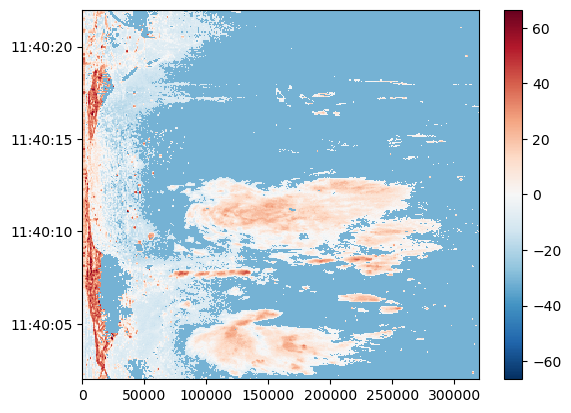

In [8]:
swp.DBZH.sortby("time").plot(x="range", y="time", add_labels=False)

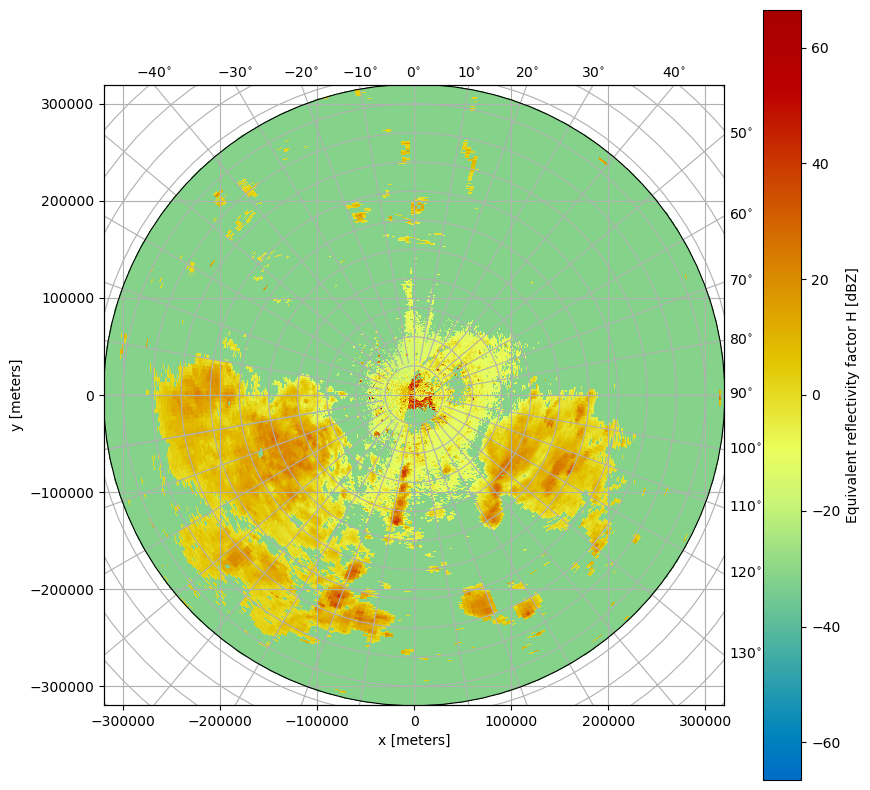

In [9]:
fig = plt.figure(figsize=(10, 10))
pm = swp.DBZH.wrl.vis.plot(crs={"latmin": 33e3}, fig=fig)

## Retrieve explicit group

In [10]:
swp_b = xr.open_dataset(
    f, engine="odim", group="sweep_13", backend_kwargs=dict(reindex_angle=False)
)
display(swp_b)

<xarray.Dataset> Size: 352kB
Dimensions:            (azimuth: 360, range: 240)
Coordinates:
    elevation          (azimuth) float32 1kB ...
    time               (azimuth) datetime64[ns] 3kB ...
  * range              (range) float32 960B 250.0 750.0 ... 1.192e+05 1.198e+05
    longitude          float32 4B ...
    latitude           float32 4B ...
    altitude           float32 4B ...
  * azimuth            (azimuth) float32 1kB 0.5 1.5 2.5 ... 357.5 358.5 359.5
Data variables:
    DBZH               (azimuth, range) float32 346kB ...
    sweep_mode         <U20 80B ...
    sweep_number       int64 8B ...
    prt_mode           <U7 28B ...
    follow_mode        <U7 28B ...
    sweep_fixed_angle  float32 4B ...
Attributes:
    Conventions:  ODIM_H5/V2_2

### Use `xr.open_mfdataset` to retrieve timeseries of explicit group 

In [11]:
flist = ["hdf5/71_20181220_060628.pvol.h5", "hdf5/71_20181220_061228.pvol.h5"]
flist = [wrl.util.get_wradlib_data_file(f) for f in flist]
ts = xr.open_mfdataset(
    flist, engine="odim", concat_dim="volume_time", combine="nested", group="sweep_0"
)
display(ts)

<xarray.Dataset> Size: 80MB
Dimensions:            (volume_time: 2, azimuth: 360, range: 1200)
Coordinates:
    elevation          (azimuth) float64 3kB dask.array<chunksize=(360,), meta=np.ndarray>
    time               (volume_time, azimuth) datetime64[ns] 6kB 2018-12-20T0...
  * range              (range) float32 5kB 125.0 375.0 ... 2.996e+05 2.999e+05
    longitude          float64 8B 151.2
    latitude           float64 8B -33.7
    altitude           float64 8B 195.0
  * azimuth            (azimuth) float32 1kB 0.5 1.5 2.5 ... 357.5 358.5 359.5
Dimensions without coordinates: volume_time
Data variables: (12/17)
    DBZH               (volume_time, azimuth, range) float64 7MB dask.array<chunksize=(1, 360, 1200), meta=np.ndarray>
    DBZH_CLEAN         (volume_time, azimuth, range) float64 7MB dask.array<chunksize=(1, 360, 1200), meta=np.ndarray>
    VRADDH             (volume_time, azimuth, range) float64 7MB dask.array<chunksize=(1, 360, 1200), meta=np.ndarray>
    VRADH              (volume_time, azimuth, range) float64 7MB dask.array<chunksize=(1, 360, 1200), meta=np.ndarray>
    WRADH              (volume_time, azimuth, range) float64 7MB dask.array<chunksize=(1, 360, 1200), meta=np.ndarray>
    TH                 (volume_time, azimuth, range) float64 7MB dask.array<chunksize=(1, 360, 1200), meta=np.ndarray>
    ...                 ...
    CLASS              (volume_time, azimuth, range) float32 3MB dask.array<chunksize=(1, 360, 1200), meta=np.ndarray>
    sweep_mode         (volume_time) <U20 160B 'azimuth_surveillance' 'azimut...
    sweep_number       (volume_time) int64 16B 0 0
    prt_mode           (volume_time) <U7 56B 'not_set' 'not_set'
    follow_mode        (volume_time) <U7 56B 'not_set' 'not_set'
    sweep_fixed_angle  (volume_time) float64 16B 0.5 0.5
Attributes:
    Conventions:  ODIM_H5/V2_2